# 包和数据

In [122]:
# 数据科学
import numpy as np
import pandas as pd
# 画图相关
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']='Songti SC' # 中文乱码
plt.rcParams['axes.unicode_minus']=False # 负号无法正常显示
%config InlineBackend.figure_format='svg' # 像素清晰
from scipy.cluster.hierarchy import linkage, dendrogram  # 绘制树状图像    


# 特征选择
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
# 特征工程
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# 分类模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB  # 伯努利贝叶斯
# 回归模型
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression  # 一元线性回归模型
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge  # 岭回归
from sklearn.linear_model import Lasso

# 集成算法
from xgboost import XGBRegressor 
from catboost import CatBoostRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor 
# 模型评估
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score 

data = pd.read_csv('./result/final_data.csv', encoding='utf-8-sig')

# 特征工程

数据还需要一些帮助进行特征工程的处理，例如去除标号

In [123]:
data = data.drop(['日期'], axis=1)
data = data.drop(['date'], axis=1)

no_flow = data.drop(['客流'], axis=1)

## 1.特征相关性分析

特征相关性分析，是为了查看特征之间是否存在多重共线性，如果有多重共线性的话，就要对相关性特别高的特征进行有选择的删除。从热力图的结果来看，MA5和MA10的相关性是最高的，但也可以接受，不需要对特征进行删除。

,星期,year,month,is_weekend,is_holiday,season,最高温,最低温,天气1,天气2,...,哈尔滨旅游,哈尔滨极地馆,小土豆,尔滨,沙糖桔,萧红故居,龙塔,pre_flow,ma5_flow,ma10_flow
星期,1.000000,-0.002882,0.014261,0.790547,0.647264,0.001551,-0.001316,-0.000996,-0.003825,0.017285,...,0.000417,0.006754,0.016283,-0.007117,0.010679,-0.068307,0.051741,0.005461,-0.013595,0.004415
year,-0.002882,1.000000,-0.320534,-0.000063,0.003515,-0.253524,-0.184819,-0.199979,0.089939,-0.023885,...,0.530138,0.180711,0.666532,0.486588,0.591856,0.249120,-0.087379,0.460416,0.504526,0.518607
month,0.014261,-0.320534,1.000000,0.008710,-0.007734,0.624807,0.221532,0.265311,0.098650,-0.010003,...,-0.276004,-0.119381,-0.305828,-0.326639,-0.025060,-0.147296,-0.171912,0.116662,0.133739,0.154827
is_weekend,0.790547,-0.000063,0.008710,1.000000,0.829723,-0.000850,-0.008686,-0.002460,-0.004717,-0.020474,...,-0.014192,-0.005611,0.012710,-0.018970,0.009248,-0.084296,0.062553,0.044740,0.008448,0.017466
is_holiday,0.647264,0.003515,-0.007734,0.829723,1.000000,-0.006421,-0.023311,-0.014376,-0.043343,-0.052759,...,0.011230,0.036578,0.027891,-0.027980,0.010931,-0.074855,0.171822,0.124214,0.055501,0.021673
season,0.001551,-0.253524,0.624807,-0.000850,-0.006421,1.000000,0.601610,0.622885,-0.010843,0.005214,...,-0.287872,-0.014612,-0.348895,-0.281933,-0.231206,0.000969,0.040564,0.265081,0.296896,0.324951
最高温,-0.001316,-0.184819,0.221532,-0.008686,-0.023311,0.601610,1.000000,0.979231,-0.133775,0.038134,...,-0.262307,0.289907,-0.369109,-0.280600,-0.453185,0.282125,0.392203,0.459600,0.489259,0.495326
最低温,-0.000996,-0.199979,0.265311,-0.002460,-0.014376,0.622885,0.979231,1.000000,-0.109174,0.094091,...,-0.269873,0.308054,-0.373344,-0.288799,-0.447950,0.272591,0.396385,0.458847,0.492049,0.496726
天气1,-0.003825,0.089939,0.098650,-0.004717,-0.043343,-0.010843,-0.133775,-0.109174,1.000000,0.215199,...,0.013749,0.028587,0.058364,0.094714,0.218068,-0.010599,-0.055256,-0.007661,0.000693,0.010828
天气2,0.017285,-0.023885,-0.010003,-0.020474,-0.052759,0.005214,0.038134,0.094091,0.215199,1.000000,...,-0.048313,0.092073,-0.010222,0.012692,-0.007252,0.025221,0.030532,0.008517,0.015465,0.013570


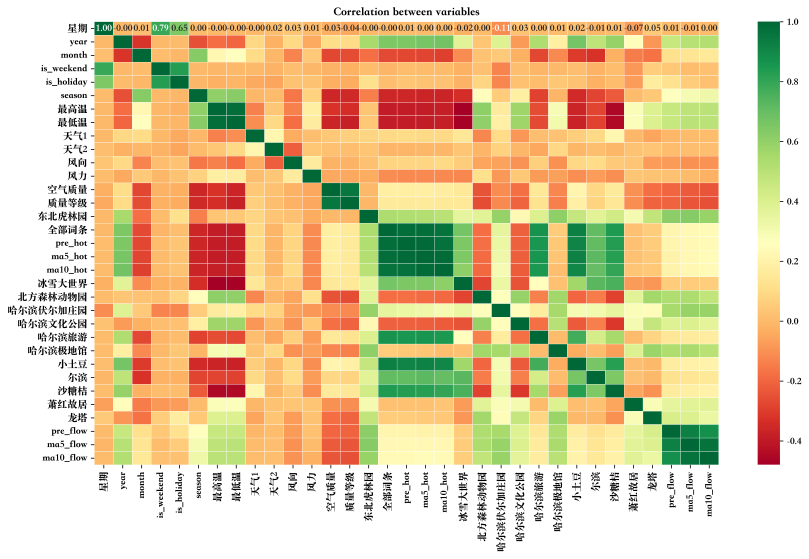

In [124]:
corr = no_flow.corr()



# 热力图展示
plt.figure(figsize=(14,8))
ax = sns.heatmap(corr, xticklabels=corr.columns,
                 yticklabels=corr.columns, linewidths=0.2, cmap="RdYlGn", annot=True, fmt=".2f")
plt.title("Correlation between variables")
corr

## 2. 目标相关性分析

Text(0.5, 1.0, 'Correlation between p_flow and variables')

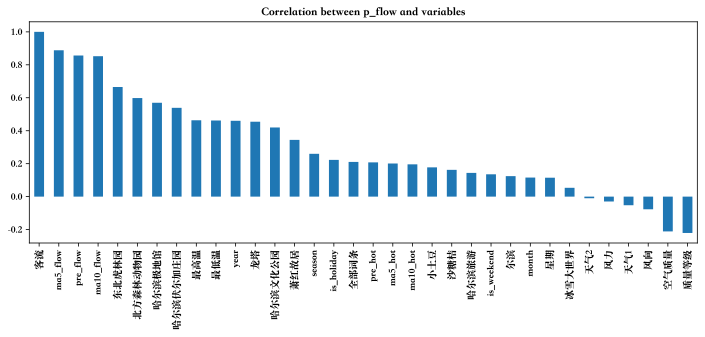

In [125]:
df_onehot = pd.get_dummies(data)
df_onehot.head()


plt.figure(figsize=(12,4))
df_onehot.corr()['客流'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation between p_flow and variables')


### 聚类验证

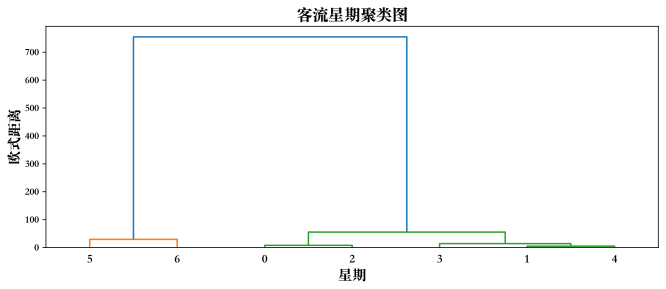

In [126]:
# 按星期聚类
table = pd.pivot_table(data, index=['星期'], values=['客流'], aggfunc='sum')  # 对数据进行聚合
plt.figure(figsize=(11,4))
Z = linkage(table, method='ward', metric='euclidean')
p = dendrogram(Z,0)
plt.xlabel("星期", fontsize=14)
plt.ylabel("欧式距离", fontsize=14)
plt.title("客流星期聚类图", fontsize=16)
plt.show()


# 模型构建


## 1. 划分数据集

In [127]:
# 构建特征值X 和目标值 Y 

# 挑选出来的可以作为自变量的特征
# X = data[['is_holiday','is_weekend','星期','ma5_flow','ma10_flow','pre_flow','天气1','天气2','尔滨','season']]
X = data[['is_holiday','is_weekend','星期','ma5_flow','天气1','天气2','season','ma5_hot']]

y = data['客流']
X.index = range(X.shape[0])

X_length = X.shape[0]
split1 = int(X_length*0.4)
split2 = int(X_length*0.8)
X_train, X_test = X[split1:split2], X[split2:]
y_train, y_test = y[split1:split2], y[split2:]


## 2. 模型搭建

In [128]:
# mae
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# mse
def mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) ** 2)

# rmse
def root_mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))

# r2
def r2_score(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

In [129]:
# 回归算法
Regressors=[["Random Forest",RandomForestRegressor()]
             ,["Decision Tree",DecisionTreeRegressor()]
             ,["Lasso",Lasso()]
             ,["AdaBoostRegressor", AdaBoostRegressor()]
             ,["GradientBoostingRegressor", GradientBoostingRegressor()]
             ,["XGB", XGBRegressor()]
             ,["CatBoost", CatBoostRegressor(logging_level='Silent')]  
]
reg_result=[]
names=[]
prediction=[]
for name,reg in Regressors:
    reg = reg.fit(X_train, y_train)
    y_pred=reg.predict(X_test)
    #回归评估
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2= r2_score(y_test,y_pred)
    class_eva=pd.DataFrame([mae,mse,r2])
    reg_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)


/var/folders/dm/cmsrk78d5nj0z9l_9zyb6yjc0000gn/T/ipykernel_6003/3397737736.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/var/folders/dm/cmsrk78d5nj0z9l_9zyb6yjc0000gn/T/ipykernel_6003/3397737736.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/var/folders/dm/cmsrk78d5nj0z9l_9zyb6yjc0000gn/T/ipykernel_6003/3397737736.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/var/folders/dm/cmsrk78d5nj0z9l_9zyb6yjc0000gn/T/ipykernel_6003/3397737736.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/var/folders/dm/cmsrk78d5nj0z9l_9zyb6yjc0000gn/T/ipykernel_6003/3397737736.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/var/folders/dm/cmsrk78d5nj0z9l_9zy

## 3. 模型评估

In [130]:
names=pd.DataFrame(names)
names=names[0].tolist()
result=pd.concat(reg_result,axis=1)
result.columns=names
result.index=["mae","mse","r2"]
result

,Random Forest,Decision Tree,Lasso,AdaBoostRegressor,GradientBoostingRegressor,XGB,CatBoost
mae,inf,inf,inf,inf,inf,inf,inf
mse,31.624723,54.203236,45.539542,34.064523,75.432225,34.655307,26.046757
r2,0.416301,-0.000431,0.159475,0.371270,-0.392255,0.360366,0.519254


/var/folders/dm/cmsrk78d5nj0z9l_9zyb6yjc0000gn/T/ipykernel_6003/1039398148.py:12: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.plot(y_test.ravel(),label='真实值')


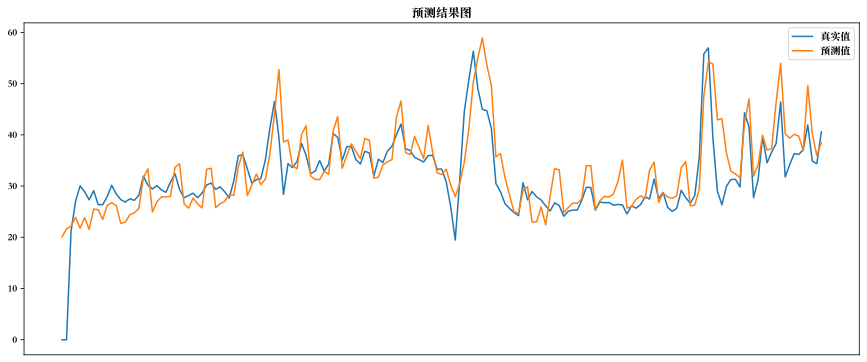

In [131]:
rfc = RandomForestRegressor(n_estimators=50     
                          ,random_state=1       
                          ,bootstrap=True      
                          ,oob_score=True     
                            )
rfc = rfc.fit(X_train, y_train)
y_pred = reg.predict(X_test)


plt.figure(figsize=(15,6))
plt.title('预测结果图')
plt.plot(y_test.ravel(),label='真实值')
plt.plot(y_pred,label='预测值')
plt.xticks([])
plt.legend()
plt.show()

## 4. 分析
对于我们的模型，特征的重要性分析

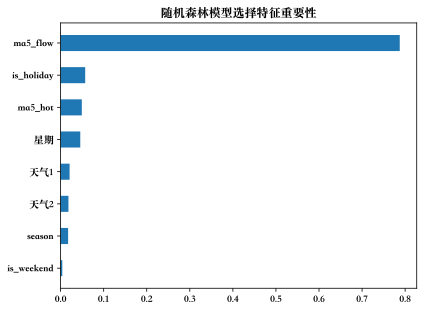

In [132]:
rfc.feature_importances_
features = X_train.columns
impor = pd.DataFrame([*zip(features, rfc.feature_importances_)])
impor.columns= ['feature', 'importance']
impor.sort_values(by='importance', inplace = True)
# 随机森林模型选择特征重要性
plt.barh(impor['feature'], height=0.5, width=impor['importance'])
plt.title("随机森林模型选择特征重要性")
plt.show()
